Q1. What is PCA?

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often

used to reduce the dimensionality of large data sets, by transforming a large set of

variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of

accuracy, but the trick in dimensionality reduction is to trade a little accuracy for

simplicity. Because smaller data sets are easier to explore and visualize and make

analyzing data much easier and faster for machine learning algorithms.

The idea of PCA is simple — reduce the number of variables of a data set, while

preserving as much information as possible.

Q2. Explain the different steps followed in PCA.


Step 1: Standardization

The aim of this step is to standardize the range of the continuous initial variables
so that each one of them contributes equally to the analysis.
The reason why it is critical to perform standardization prior to PCA, is that PCA is
quite sensitive regarding the variances of the initial variables. That is, if there are
large differences between the ranges of initial variables, those variables with
larger ranges will dominate over those with small ranges (For example, a variable
that ranges between 0 and 100 will dominate over a variable that ranges between
0 and 1), which will lead to biased results. So, transforming the data to
comparable scales can prevent this problem.

Step 2: Covariance Matrix Computation

The aim of this step is to understand how the variables of the input data set are
related, what is the relationship between them.
Because sometimes, variables are highly correlated in such a way that they
contain redundant information.
So, in order to identify these correlations, we compute the covariance matrix.

The covariance matrix is a p × p symmetric matrix (where p is the number of
dimensions) that has as entries the covariances associated with all possible pairs
of the initial variables

Step 3: Compute the Eigen Vectors and Eigen Values

Principal components are new variables that are constructed as linear
combinations or mixtures of the initial variables.
These combinations are done in such a way that the new variables (i.e., principal
components) are uncorrelated and most of the information within the initial
variables is squeezed or compressed into the first components.
So, the idea is 10-dimensional data gives you 10 principal components, but PCA
tries to put maximum possible information in the first component, then maximum
remaining information in the second and so on.

The number of eigenvectors is equal to number of dimensions.
It is eigenvectors and eigenvalues who are behind all the magic, because the
eigenvectors of the Covariance matrix are actually the directions of the axes
where there is the most variance(most information) and that we call Principal
Components. And eigenvalues are simply the coefficients attached to
eigenvectors, which give the amount of variance carried in each Principal
Component.
By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you
get the principal components in order of significance.

Step 4: Feature Matrix

In this step, what we do is, to choose whether to keep all these components or
discard those of lesser significance (of low eigenvalues), and form with the
remaining ones a matrix of vectors that we call Feature matrix.
So, the feature vector is simply a matrix that has as columns the eigenvectors of
the components that we decide to keep. This makes it the first step towards
dimensionality reduction, because if we choose to keep only p eigenvectors
(components) out of n, the final data set will have only p dimensions.

Step 5: Recast the data along the Principal Components

In the previous steps, apart from standardization, you do not make any changes
on the data, you just select the principal components and form the feature matrix,
but the input data set remains always in terms of the original axes (i.e, in terms of
the initial variables).
In this step, which is the last one, the aim is to use the feature vector formed using
the eigenvectors of the covariance matrix, to reorient the data from the original
axes to the ones represented by the principal components (hence the name
Principal Components Analysis). 

Final Dataset = Original Data . Feature Matrix

Let number of features be d and number of records be n.

Let principal components selected be p.

Each eigen vector dimension = d X 1

Feature vector dimension = d X p

Original Dataset dimension = n X d

Final Data set dimension = n X p {Original Data . Feature Matrix = (n X d).(d X p)}

Q3. What is Eigen vector and Eigen value?


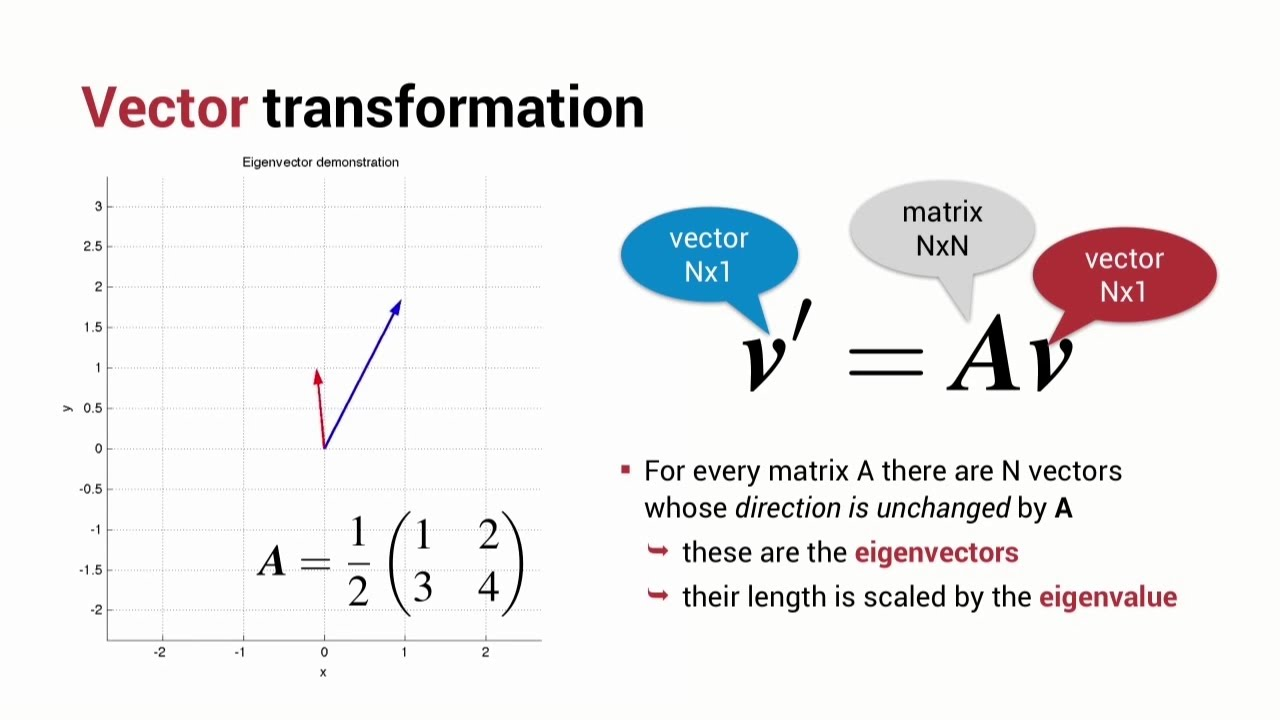

Q4. Suppose the number of features in your dataset be “f” , number of records

be “r” and principal components selected be “p” then

1) Find the dimension of Each eigen vector

2) Find the dimension of Feature vector

3) Find the dimension of Original Dataset

4) Find the dimension of Final Data set

1) (f*1)

2) (f*p)

3) (r*f)

4) (r*p) 

Q5. Is PCA a supervised learning algorithm or unsupervised learning algorithm?


unsupervised learning algorithm

Q6. Does PCA work well with non linearly correlated data?


It is simply that the assumptions underlying PCA are linear - and the interpretation is only valid if those assumptions are true. OF course, you can still do a PCA computation on nonlinear data - but the results will be meaningless, beyond decomposing to the dominant linear modes and provided a global linear representation of the spread of the data.  

Q7. Does PCA always finds orthogonal principal components?


Yess

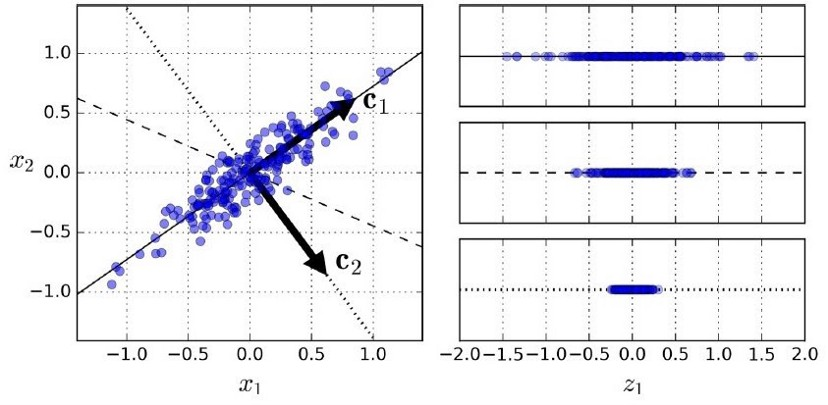

Principal Component Analysis (PCA) is an unsupervised dimensionality reduction algorithm. It identifies the hyperplane that lies closest to the data, and then it projects the data onto it preserving the variance.



Here is a result of the projection of a dataset onto each of these axes. As you can see, the projection onto the solid line preserves the maximum variance, while the projection onto the dotted line preserves very little variance, and the projection onto the dashed line preserves an intermediate amount of variance.


PCA selects the axis which preserves maximum variance in the training set. PCA finds as many axes as the number of dimensions such that every axis is orthogonal to each other.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [80]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/Wine (1).csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [81]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [83]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [84]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [85]:
df1 = df.drop("Customer_Segment" , axis = 1)

In [86]:
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = sc.fit_transform(df1)

In [88]:
from sklearn.decomposition import PCA
pca = PCA(4)

In [111]:
pri = pca.fit_transform(df)

In [90]:
pri

array([[ 3.18564055e+02,  2.14907729e+01,  3.16461306e+00,
        -2.60165816e-01],
       [ 3.03098514e+02, -5.36608268e+00,  6.81699246e+00,
        -1.00497751e+00],
       [ 4.38062063e+02, -6.53798613e+00, -1.06671672e+00,
         9.77726666e-01],
       [ 7.33240711e+02,  1.93319951e-01, -9.38312300e-01,
        -5.25348857e-01],
       [-1.15699516e+01,  1.84872549e+01, -4.24917332e-01,
         1.51882323e+00],
       [ 7.03231800e+02, -3.31723191e-01,  9.22964109e-01,
        -4.07349276e-01],
       [ 5.42972384e+02, -1.35191971e+01,  2.12077648e+00,
        -7.37765907e-03],
       [ 5.48402656e+02,  1.14491475e+01,  7.17177590e-02,
         1.34225532e+00],
       [ 2.98037964e+02, -8.18149185e+00,  3.89306597e+00,
        -9.49011409e-01],
       [ 2.98050654e+02, -7.10283985e+00,  1.57388714e+00,
        -1.62300075e+00],
       [ 7.63080247e+02, -8.33356923e+00, -1.87870022e+00,
         1.59654200e+00],
       [ 5.32944043e+02, -1.42878810e+01,  1.47596597e-01,
      

In [91]:
pca.explained_variance_ratio_

array([9.98087625e-01, 1.73591851e-03, 9.58948998e-05, 5.13200714e-05])

In [92]:
data = pd.DataFrame(pri , columns = ["PC1","PC2","PC3","PC4"])

In [93]:
data["Cluster"] = df["Customer_Segment"].values

In [94]:
data

,PC1,PC2,PC3,PC4,Cluster
0,318.564055,21.490773,3.164613,-0.260166,1
1,303.098514,-5.366083,6.816992,-1.004978,1
2,438.062063,-6.537986,-1.066717,0.977727,1
3,733.240711,0.193320,-0.938312,-0.525349,1
4,-11.569952,18.487255,-0.424917,1.518823,1
...,...,...,...,...,...
173,-6.981858,-4.538116,-2.625187,-3.214097,3
174,3.129945,2.338236,-4.423240,-1.576971,3
175,88.456310,18.779644,-2.423127,-4.874280,3
176,93.454472,18.674180,-1.958775,-3.789964,3


In [95]:
X = data.drop("Cluster" , axis = 1)
Y = data[["Cluster"]]

In [96]:
data.isnull().sum()

PC1        0
PC2        0
PC3        0
PC4        0
Cluster    0
dtype: int64

With PCA Model Building

In [97]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,
                                    random_state = 42)

In [98]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,Y_train)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
Y_pred = lg.predict(X_test)

In [100]:
from sklearn import metrics
metrics.confusion_matrix(Y_test,Y_pred)

array([[13,  1,  0],
       [ 0, 14,  0],
       [ 1,  0,  7]], dtype=int64)

In [101]:
metrics.accuracy_score(Y_test,Y_pred)

0.9444444444444444

In [102]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



Without PCA model Buildig

In [103]:
X = df.drop("Customer_Segment" , axis = 1)
Y = df[["Customer_Segment"]]

In [104]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,
                                    random_state = 42)

In [105]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,Y_train)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
Y_pred = lg.predict(X_test)

In [107]:
from sklearn import metrics
metrics.confusion_matrix(Y_test,Y_pred)

array([[13,  1,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

In [108]:
metrics.accuracy_score(Y_test,Y_pred)

0.9722222222222222

In [109]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [110]:
Y_pred_proba = lg.predict_proba(X_test)[::,1]
Y_pred_proba

array([1.35058122e-02, 1.43080291e-03, 2.05946243e-01, 1.52598291e-03,
       9.04584878e-01, 3.89766661e-04, 9.86465607e-01, 2.00520370e-04,
       9.67993099e-01, 1.19501513e-02, 5.55918255e-01, 1.39179014e-04,
       3.48733526e-03, 7.04336948e-01, 1.20006143e-05, 9.99680421e-01,
       9.97805878e-01, 9.97644765e-01, 2.60902939e-04, 9.99376099e-01,
       1.34126809e-08, 5.55626219e-01, 6.37396451e-01, 3.00480571e-05,
       9.14034645e-07, 3.07149683e-06, 9.99935042e-01, 5.97284872e-01,
       9.88043497e-01, 4.30671355e-03, 4.12116955e-03, 9.99952573e-01,
       1.05604602e-01, 3.08425676e-06, 1.85670802e-05, 4.03052160e-04])